# **Prediction using Supervised ML**

### **Author : VISHAL RAMESH PATIL**

### **TSF GRIP DATA SCIENCE AND BUSINESS ANALYTICS INTERN TASK 1**

Predicting the percentage marks of a student based on the number of
study hours. 

### **STEP 1 - Importing all the required Libraries and Datasets**

In [81]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [82]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **STEP 2 - Analyzing the Data for NULL values or Errors**

In [83]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No NULL value is found in the data. Therefore no Data Cleaning is required.
Thus, we are good to go in Plotting the data.

### **STEP 3 - Plotting the Data**

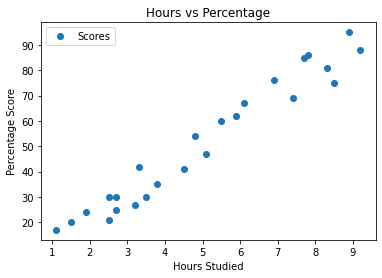

In [84]:
df.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the above graph we come to a conclusion that there is a positive linear relation between the number of hours studied and percentage of score. So we'll apply Linear Regression Model.

### **STEP 4 - Preparing the Data for Training**

In [85]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values 

The division of data can also be done by running:

X = df[['Hours']].values

Y = df[['Scores']].values

The next step is to split this data into training and test sets.

We'll do this by using Scikit-Learn's built-in train_test_split() method as follows:

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

### **STEP 5 - Training the Algorithm**

Importing Linear Regression model and creating an instance

In [87]:
# X = X.reshape((1,-1))
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)

print("Training complete.")

Training complete.


Plotting the Regression line

In [88]:
line =regressor.coef_*X+regressor.intercept_
print(line)

[[26.79480124]
 [52.56250809]
 [33.73226078]
 [86.25874013]
 [36.70545772]
 [16.88414476]
 [93.19619966]
 [56.52677068]
 [84.27660883]
 [28.77693254]
 [78.33021494]
 [60.49103328]
 [46.6161142 ]
 [34.72332643]
 [12.91988217]
 [90.22300272]
 [26.79480124]
 [20.84840735]
 [62.47316457]
 [75.357018  ]
 [28.77693254]
 [49.58931115]
 [39.67865467]
 [70.40168976]
 [79.32128059]]


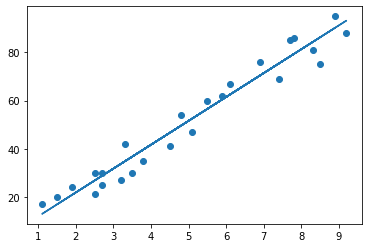

In [89]:
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### **STEP 6 - Making Predictions**
Now the Algorithm is trained and let's make some predictions.

In [90]:
print(X_test)                               # Testing data - In Hours
y_pred = regressor.predict(X_test)          # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Comparing the Actual Data vs Predicted Results

In [91]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **STEP 7 - Predicting for 9.25 hrs/day**

In [92]:
hours = np.array(9.25).reshape(1, -1)
own_predt = regressor.predict(hours)
print('If the student reads for %0.3f hours then he will score %0.3f'%(9.25, own_predt[0]))

If the student reads for 9.250 hours then he will score 93.692


### **STEP 8 - Evaluating the Model**
The final step is to evaluate the performance of algorithm with mean square error. This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [93]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982


## THANK YOU!